In [1]:
import gensim

import gensim.corpora as corpora
from gensim.models import LdaModel

import utils.filemanagement
from utils.filemanagement import get_project_root
from utils.filemanagement import load_from_file
from pprint import pprint
import os

In [2]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

NUM_TOPICS = 10
TOPN = 20

model_type = "lda"
model_name="LDA"
data_type = "np_mini_stopwords"
embedding_model = "preliminary"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"

file_name_data = f"{data_type}.csv"
folder_path_word_cloud = f"preprocessed_data/wordclouds/preliminary/{file_name}"
folder_name = f"Preliminary-experiment/models/{model_type}"
random_sample = False
df = load_from_file(folder_path_data,file_name_data)
seed = 42
folder_name = f"Preliminary-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

In [3]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))


data_words = list(sent_to_words(new_data))

In [4]:
import os
from gensim.models import LdaMulticore

id2word = corpora.Dictionary(data_words)
texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
folder_name = f"Preliminary-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

try:
    lda = LdaMulticore.load(file_path)
except:
    lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=NUM_TOPICS,
                                       random_state=42,
                                       #chunksize=100,
                                       #passes=15,
                                       #per_word_topics=True
                                      )
    LdaMulticore.save(lda, file_path)

In [5]:
lda.get_topics()

array([[2.9162018e-04, 4.1791404e-04, 2.9014727e-05, ..., 2.0689142e-06,
        2.0689147e-06, 2.0689097e-06],
       [3.4623797e-04, 5.7985692e-04, 2.0831634e-05, ..., 2.5859927e-05,
        2.7029815e-05, 2.6279438e-05],
       [2.3172356e-04, 6.9275353e-04, 2.1221111e-05, ..., 3.7701968e-06,
        3.7701968e-06, 3.7701977e-06],
       ...,
       [2.9004677e-04, 3.8229028e-04, 1.2942410e-05, ..., 2.2410163e-06,
        2.2410156e-06, 2.2410129e-06],
       [2.4417031e-04, 3.0195550e-04, 4.6911438e-05, ..., 2.5030388e-06,
        2.5030331e-06, 2.5030372e-06],
       [2.0637068e-04, 4.9472897e-04, 3.6788511e-05, ..., 2.0359635e-06,
        2.0359630e-06, 2.0359614e-06]], dtype=float32)

In [6]:
lda.get_topic_terms(0,5)

[(279, 0.009254648),
 (105, 0.007109908),
 (107, 0.00534482),
 (46, 0.0048257452),
 (124, 0.0044436418)]

In [7]:
topic_words = [[] for i in range(NUM_TOPICS)]

for i in range(NUM_TOPICS):
    r = lda.get_topic_terms(i,TOPN)
    for item in r:
        topic_words[i].append(id2word[item[0]])

In [8]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, topic_words[i]) for i in range(NUM_TOPICS)]

folder_path_topics = r"preprocessed_data/results"
write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [9]:

# Print the Keyword in the 10 topics
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(0,
  '0.009*"statsraden" + 0.007*"regjeringen" + 0.005*"representanten" + '
  '0.005*"gjelder" + 0.004*"sv" + 0.004*"stortinget" + 0.004*"norge" + '
  '0.003*"pst" + 0.003*"land" + 0.003*"ønsker"'),
 (1,
  '0.006*"norge" + 0.006*"gjelder" + 0.006*"statsraden" + 0.005*"forhold" + '
  '0.004*"stortinget" + 0.004*"sv" + 0.004*"regjeringen" + 0.003*"ønsker" + '
  '0.003*"representanten" + 0.003*"kr"'),
 (2,
  '0.005*"norge" + 0.004*"regjeringen" + 0.004*"gjelder" + 0.004*"sv" + '
  '0.003*"statsraden" + 0.003*"tror" + 0.003*"spørsmal" + 0.003*"kr" + '
  '0.003*"representanten" + 0.002*"forslag"'),
 (3,
  '0.006*"norge" + 0.005*"ønsker" + 0.005*"gjelder" + 0.004*"representanten" + '
  '0.004*"regjeringen" + 0.004*"barn" + 0.003*"forhold" + 0.003*"stortinget" + '
  '0.003*"statsraden" + 0.003*"sagt"'),
 (4,
  '0.008*"statsraden" + 0.005*"representanten" + 0.004*"tror" + '
  '0.003*"regjeringen" + 0.003*"stortinget" + 0.002*"gjelder" + 0.002*"kr" + '
  '0.002*"tiltak" + 0.002*"forslag" + 0.

In [10]:
formatted_topics = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]

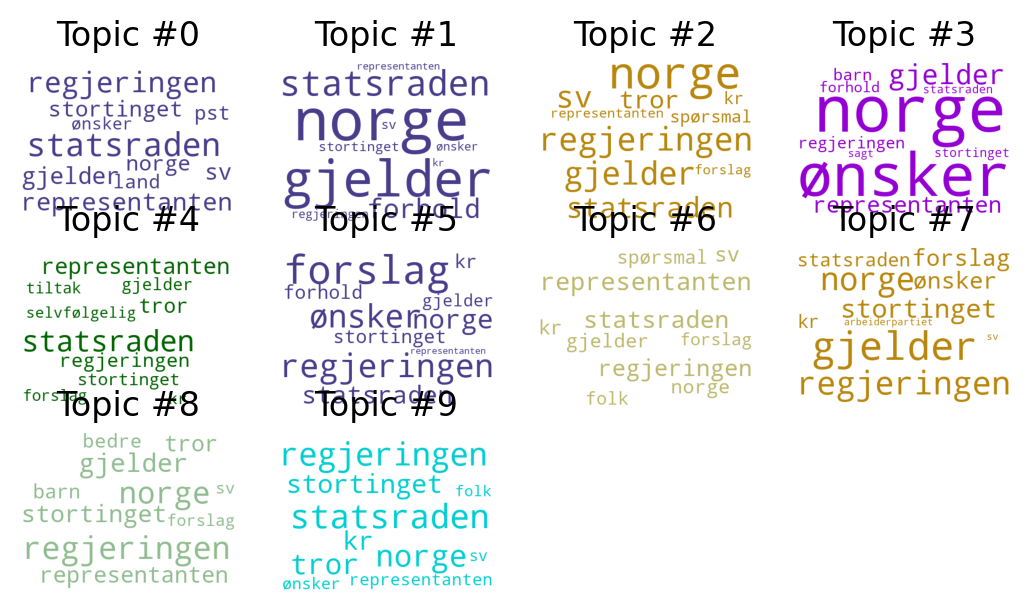

In [11]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds([dict(lda.show_topic(i)) for i in range(NUM_TOPICS)], f"{model_name}: {data_type}", NUM_TOPICS, dpi=200)

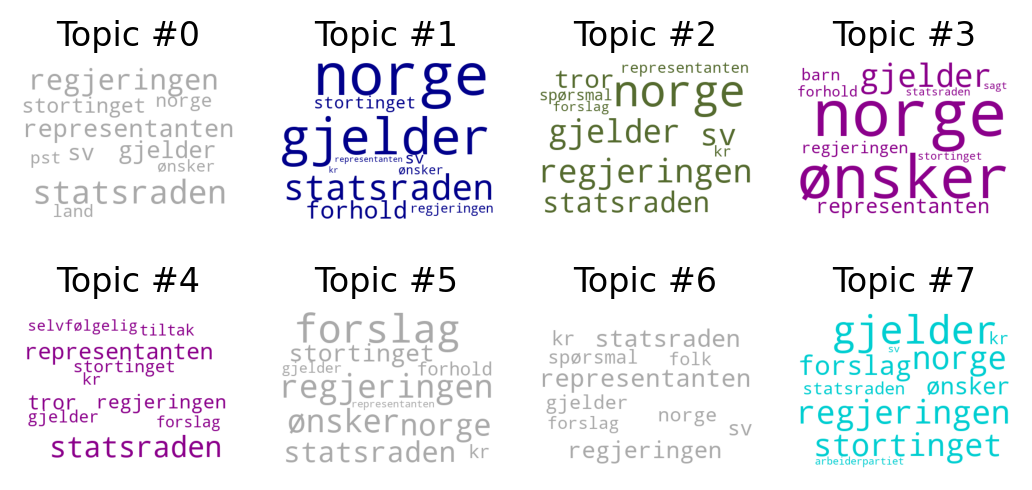

In [12]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [13]:
reck = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]
print(reck)

[{'statsraden': 0.009254648, 'regjeringen': 0.007109908, 'representanten': 0.00534482, 'gjelder': 0.0048257452, 'sv': 0.0044436418, 'stortinget': 0.0041796835, 'norge': 0.0040034275, 'pst': 0.0033683153, 'land': 0.0032729716, 'ønsker': 0.002831831}, {'norge': 0.006485768, 'gjelder': 0.0059330813, 'statsraden': 0.0057115364, 'forhold': 0.0049948674, 'stortinget': 0.003960602, 'sv': 0.0036770138, 'regjeringen': 0.0035184477, 'ønsker': 0.003362504, 'representanten': 0.0031129655, 'kr': 0.0030815897}, {'norge': 0.0051553748, 'regjeringen': 0.0044071064, 'gjelder': 0.004316509, 'sv': 0.003944293, 'statsraden': 0.0033843503, 'tror': 0.0027212498, 'spørsmal': 0.002691482, 'kr': 0.002584244, 'representanten': 0.002527246, 'forslag': 0.0024548024}, {'norge': 0.0058998377, 'ønsker': 0.0049660965, 'gjelder': 0.0048628054, 'representanten': 0.004441824, 'regjeringen': 0.0041935965, 'barn': 0.0041105077, 'forhold': 0.003237118, 'stortinget': 0.0030006322, 'statsraden': 0.0029373402, 'sagt': 0.00275

In [14]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(lda.show_topic(i)))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [15]:
lda.show_topic(1)

[('norge', 0.006485768),
 ('gjelder', 0.0059330813),
 ('statsraden', 0.0057115364),
 ('forhold', 0.0049948674),
 ('stortinget', 0.003960602),
 ('sv', 0.0036770138),
 ('regjeringen', 0.0035184477),
 ('ønsker', 0.003362504),
 ('representanten', 0.0031129655),
 ('kr', 0.0030815897)]

In [16]:
# Save topic words of model to file

topics = lda.show_topics(num_words=20, formatted=False)
topic_words = []
for i in range(len(topics)):
    topic_word_list = []
    for j in range(len(topics[i][1])):
        topic_word_list.append(topics[i][1][j][0])
    topic_words.append((i, topic_word_list))


folder_path_topics = r"preprocessed_data/results"


write_topics_file(folder_path_topics, file_name, topic_words)

In [17]:
from utils.filemanagement import load_model_topics

folder_path_topics = r"preprocessed_data/results"

loaded_topics = load_model_topics(folder_path_topics, file_name)

folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [18]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [19]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [20]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('regjeringen', 'statsraden') wordtuple
('representanten', 'statsraden') wordtuple
('gjelder', 'statsraden') wordtuple
('statsraden', 'sv') wordtuple
('statsraden', 'stortinget') wordtuple
('norge', 'statsraden') wordtuple
('pst', 'statsraden') wordtuple
('land', 'statsraden') wordtuple
('statsraden', 'ønsker') wordtuple
('regjeringen', 'representanten') wordtuple
('regjeringen', 'representanten') wordup
1002.0 over
3528402.0 under
-11.781916716380072 -9.968666793195208 1.1818949274563597 ('regjeringen', 'representanten') 1002 2174 1623
('gjelder', 'regjeringen') wordtuple
('gjelder', 'regjeringen') wordup
1876.0 over
3832762.0 under
-10.996508871832114 -10.873444112515378 1.011317918963237 ('gjelder', 'regjeringen') 1876 2174 1763
('regjeringen', 'sv') wordtuple
('regjeringen', 'sv') wordup
1271.0 over
2917508.0 under
-11.164556866222535 -10.311748315004959 1.0827026150334398 ('regjeringen', 'sv') 1271 2174 1342
('regjeringen', 'stortinget') wordtuple
('regjeringen', 'stortinget') 

In [21]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.05205947982354002


In [22]:
print(diversity)
print(coherence)

0.22
0.6671865748829066


In [23]:
# Check the stats for the dataset after running stopwords pipeline
from tabulate import tabulate
import csv
models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════╤═══════════╤══════════╕
│ Model                             │ Metric    │    Value │
╞═══════════════════════════════════╪═══════════╪══════════╡
│ lda_preliminary_np_mini_stopwords │ coherence │ 0.667187 │
├───────────────────────────────────┼───────────┼──────────┤
│ lda_preliminary_np_mini_stopwords │ diversity │ 0.22     │
╘═══════════════════════════════════╧═══════════╧══════════╛


In [24]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})